In [ ]:
!pip install datasets transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 1.6 MB/s eta 0:00:00


In [ ]:
root_dir = "/content/drive/Othercomputers/Mac/Mila/Winter_2023/ift6759_project/"

%matplotlib inline
%load_ext autoreload
%autoreload 2

from google.colab import drive
import sys

drive.mount('/content/drive')
sys.path.append(root_dir)

Mounted at /content/drive


In [ ]:
# from transformers import AutoFeatureExtractor
# from torchvision import transforms

# feature_extractor = AutoFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")

# transform = transforms.Compose([
#     transforms.Lambda(lambda pil_img: pil_img.convert("RGB")),
#     transforms.Resize((feature_extractor.size["height"], feature_extractor.size["width"])),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std),
# ])

/usr/local/lib/python3.9/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
from covidSeverityDataset import CovidSeverityDataset

dataset = CovidSeverityDataset(root_dir, batch_size = 4)
train_dataset, val_dataset, test_dataset = dataset.get_subsets()

# Exploratory data visualization



In [ ]:
res = []
for batch in train_dataset:
  _, labels = batch
  res = [*res, *labels] 

In [ ]:
result = [tensor.item() for tensor in res]

In [ ]:
print(result)

[4, 2, 4, 5, 5, 2, 4, 2, 3, 4, 3, 4, 2, 4, 1, 3, 2, 4, 3, 3, 3, 5, 5, 4, 5, 0, 1, 2, 2, 4, 1, 4, 1, 2, 4, 3, 2, 3, 5, 2, 4, 4, 4, 2, 3, 4, 3, 2, 4, 3, 3, 3, 4, 2, 4, 5, 1, 2, 3, 5, 1, 3, 3, 4, 2, 3, 5, 4, 3, 4, 2, 3, 3, 2, 0, 3, 4, 4, 5, 4, 5, 2, 0, 3, 4, 3, 3, 5, 2, 1, 3, 3, 5, 3, 4, 2, 1, 3, 4, 0, 3, 4, 1, 4, 1, 3, 4, 2, 0, 1, 2, 4, 2, 2, 3, 3, 2, 4, 3, 5, 3, 4, 3, 4, 0, 3, 3, 5, 1, 3, 3, 1, 3, 2, 4, 3, 3, 4, 0, 1, 4, 6, 3, 3, 3, 2, 3, 2, 4, 4, 5, 4, 4, 5, 1, 4, 4, 4, 3, 4, 4, 1, 2, 3, 1, 4, 1, 3, 3, 3, 3, 2, 5, 2, 1, 3, 1, 3, 4, 3, 5, 5, 2, 2, 3, 4, 4, 4, 4, 3, 3, 4, 3, 3, 2, 1, 3, 1, 4, 3, 3, 2, 4, 4, 2, 4, 4, 4, 3, 2, 1, 2, 4, 3, 2, 3, 1, 5, 5, 1, 3, 2, 4, 2, 4, 3, 3, 3, 3, 3, 4, 3, 3, 5, 4, 4, 4, 3, 2, 3, 3, 1, 4, 4, 3, 1, 2, 2, 4, 2, 4, 2, 4, 5, 4, 4, 3, 2, 1, 1, 1, 2, 0, 3, 3, 3, 4, 4, 2, 3, 2, 3, 3, 2, 3, 5, 4, 5, 1, 4, 4, 2, 3, 2, 3, 6, 5, 3, 4, 3, 4, 1, 3, 1, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 1, 2, 2, 4, 2, 2, 1, 4, 2, 4, 4, 5, 3, 2, 2, 3, 3, 5, 4, 3, 4, 2, 1, 2, 3, 2, 2, 

In [ ]:
import matplotlib.pyplot as plt

plt.hist(result, bins=7)  
plt.xlabel('Data train');

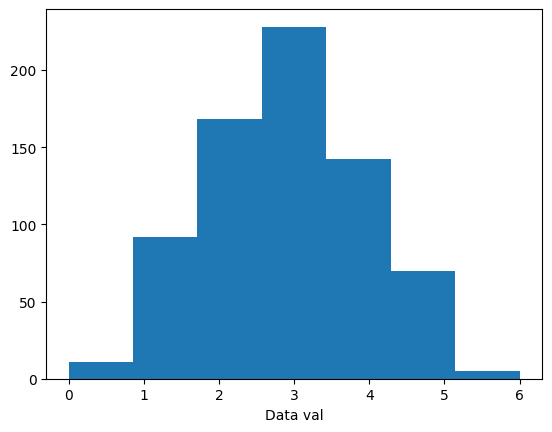

In [ ]:
import matplotlib.pyplot as plt

plt.hist(result, bins=7)  
plt.xlabel('Data val');

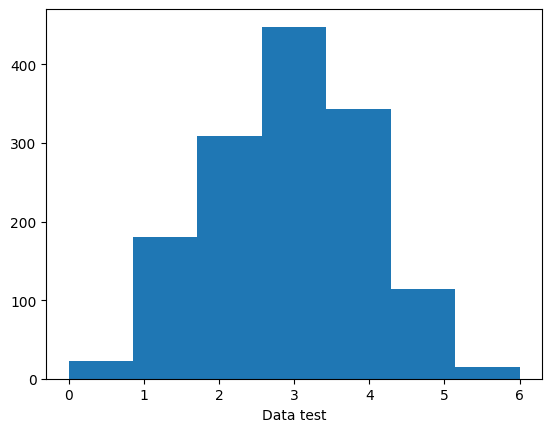

In [ ]:
import matplotlib.pyplot as plt

plt.hist(result, bins=7)  
plt.xlabel('Data test');

In [ ]:
df = dataset.dataframe["OpacityScoreGlobal"]
df.plot.hist(bins=7, alpha=0.5)

# Train

In [ ]:
import torch

def to_device(tensors, device):
    if isinstance(tensors, torch.Tensor):
        return tensors.to(device=device)
    elif isinstance(tensors, dict):
        return dict(
            (key, to_device(tensor, device)) for (key, tensor) in tensors.items()
        )
    elif isinstance(tensors, list):
        return list(
            (to_device(tensors[0], device), to_device(tensors[1], device)))
    else:
        raise NotImplementedError("Unknown type {0}".format(type(tensors)))

def compute_accuracy(logits: torch.Tensor, labels: torch.Tensor):
    """ Compute the accuracy of the batch """
    acc = (logits.argmax(dim=1) == labels).float().mean()
    return acc

In [ ]:
from transformers import ViTForImageClassification

model_name_or_path = "google/vit-base-patch16-224-in21k"

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=7,
)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

In [ ]:
import os
from tqdm.auto import tqdm
from torch import nn

def train(epoch, model, dataloader, optimizer, lr_scheduler, num_training_steps, print_every=80):
    model.train()
    total_iters = 0
    epoch_accuracy = 0
    epoch_loss = 0
    criterion = nn.CrossEntropyLoss()
    progress_bar = tqdm(range(num_training_steps))

    for idx, batch in enumerate(dataloader):
        batch = to_device(batch, device)
        optimizer.zero_grad()
        imgs, labels = batch
        output = model(imgs)
        logits = output.logits

        loss = criterion(logits, labels)     
        acc = compute_accuracy(logits, labels)

        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        epoch_accuracy += acc.item() / len(dataloader)
        epoch_loss += loss.item() / len(dataloader)
        total_iters += 1
        progress_bar.update(1)
        if idx % print_every == 0:
            tqdm.write(f"[TRAIN] Epoch: {epoch}, Iter: {idx}, Loss: {loss.item():.5f}")
    tqdm.write(f"== [TRAIN] Epoch: {epoch}, Accuracy: {epoch_accuracy:.3f} ==>")
    return epoch_loss, epoch_accuracy

def evaluate(epoch, model, dataloader, mode="val", print_every=80):
    model.eval()
    epoch_accuracy=0
    epoch_loss=0
    total_iters = 0
    criterion = nn.CrossEntropyLoss()

    with torch.no_grad():
        for idx, batch in enumerate(dataloader):
            batch = to_device(batch, device)
            imgs, labels = batch
            output = model(imgs)
            logits = output.logits

            loss = criterion(logits, labels)     
            acc = compute_accuracy(logits, labels)

            epoch_accuracy += acc.item() / len(dataloader)
            epoch_loss += loss.item() / len(dataloader)
            total_iters += 1
            if idx % print_every == 0:
                tqdm.write(
                    f"[{mode.upper()}] Epoch: {epoch}, Iter: {idx}, Loss: {loss.item():.5f}"
                )
        tqdm.write(
            f"=== [{mode.upper()}] Epoch: {epoch}, Iter: {idx}, Accuracy: {epoch_accuracy:.3f} ===>"
        )
    return epoch_loss, epoch_accuracy

In [ ]:
from torch.optim import AdamW
from transformers import get_scheduler

num_epochs = 10

optimizer = AdamW(model.parameters(), lr=5e-5)
num_training_steps = num_epochs * len(train_dataset)
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

In [ ]:
from tqdm import tqdm

train_losses, valid_losses = [], []
train_accs, valid_accs = [], []

for epoch in range(num_epochs):
    tqdm.write(f"====== Epoch {epoch} ======>")
    loss, acc = train(epoch, model, train_dataset, optimizer, lr_scheduler, num_training_steps)
    train_losses.append(loss)
    train_accs.append(acc)

    loss, acc = evaluate(epoch, model, val_dataset)
    valid_losses.append(loss)
    valid_accs.append(acc)

    if epoch % 10 == 0:
      torch.save(model, root_dir + "luis_test/model_" + str(epoch) + ".h5")

test_loss, test_acc, test_time = evaluate(
    epoch, model, test_dataset, mode="test"
)
torch.save(model, root_dir + "luis_test/model.h5")

====== Epoch 0 ======>


  0%|          | 0/400 [01:52<?, ?it/s]

[TRAIN] Epoch: 0, Iter: 0, Loss: 2.00183


780it [1:08:16,  5.25s/it]


== [TRAIN] Epoch: 0, Accuracy: 0.345 ==>
[VAL] Epoch: 0, Iter: 0, Loss: 1.42236
=== [VAL] Epoch: 0, Iter: 5, Accuracy: 0.403 ===>
====== Epoch 1 ======>


  0%|          | 0/400 [00:01<?, ?it/s]

[TRAIN] Epoch: 1, Iter: 0, Loss: 1.36586


780it [00:49, 15.70it/s]


== [TRAIN] Epoch: 1, Accuracy: 0.470 ==>
[VAL] Epoch: 1, Iter: 0, Loss: 1.38136
=== [VAL] Epoch: 1, Iter: 5, Accuracy: 0.455 ===>
====== Epoch 2 ======>


  0%|          | 0/400 [00:01<?, ?it/s]

[TRAIN] Epoch: 2, Iter: 0, Loss: 1.20217


780it [00:49, 15.77it/s]


== [TRAIN] Epoch: 2, Accuracy: 0.519 ==>
[VAL] Epoch: 2, Iter: 0, Loss: 1.24312
=== [VAL] Epoch: 2, Iter: 5, Accuracy: 0.507 ===>
====== Epoch 3 ======>


  0%|          | 0/400 [00:01<?, ?it/s]

[TRAIN] Epoch: 3, Iter: 0, Loss: 1.08360


780it [00:49, 15.75it/s]


== [TRAIN] Epoch: 3, Accuracy: 0.562 ==>
[VAL] Epoch: 3, Iter: 0, Loss: 1.22199
=== [VAL] Epoch: 3, Iter: 5, Accuracy: 0.500 ===>
====== Epoch 4 ======>


  0%|          | 0/400 [00:01<?, ?it/s]

[TRAIN] Epoch: 4, Iter: 0, Loss: 1.03676


780it [00:49, 15.70it/s]


== [TRAIN] Epoch: 4, Accuracy: 0.597 ==>
[VAL] Epoch: 4, Iter: 0, Loss: 1.25716
=== [VAL] Epoch: 4, Iter: 5, Accuracy: 0.494 ===>
====== Epoch 5 ======>


  0%|          | 0/400 [00:01<?, ?it/s]

[TRAIN] Epoch: 5, Iter: 0, Loss: 0.94166


780it [00:49, 15.73it/s]


== [TRAIN] Epoch: 5, Accuracy: 0.643 ==>
[VAL] Epoch: 5, Iter: 0, Loss: 1.32769
=== [VAL] Epoch: 5, Iter: 5, Accuracy: 0.454 ===>
====== Epoch 6 ======>


  0%|          | 0/400 [00:01<?, ?it/s]

[TRAIN] Epoch: 6, Iter: 0, Loss: 0.95249


780it [00:49, 15.72it/s]


== [TRAIN] Epoch: 6, Accuracy: 0.689 ==>
[VAL] Epoch: 6, Iter: 0, Loss: 1.30109
=== [VAL] Epoch: 6, Iter: 5, Accuracy: 0.494 ===>
====== Epoch 7 ======>


  0%|          | 0/400 [00:01<?, ?it/s]

[TRAIN] Epoch: 7, Iter: 0, Loss: 0.78755


780it [00:49, 15.75it/s]


== [TRAIN] Epoch: 7, Accuracy: 0.740 ==>
[VAL] Epoch: 7, Iter: 0, Loss: 1.28044
=== [VAL] Epoch: 7, Iter: 5, Accuracy: 0.497 ===>
====== Epoch 8 ======>


  0%|          | 0/400 [00:01<?, ?it/s]

[TRAIN] Epoch: 8, Iter: 0, Loss: 0.66762


780it [00:49, 15.76it/s]


== [TRAIN] Epoch: 8, Accuracy: 0.773 ==>
[VAL] Epoch: 8, Iter: 0, Loss: 1.29331
=== [VAL] Epoch: 8, Iter: 5, Accuracy: 0.493 ===>
====== Epoch 9 ======>


  0%|          | 0/400 [00:01<?, ?it/s]

[TRAIN] Epoch: 9, Iter: 0, Loss: 0.60664


780it [00:49, 15.67it/s]


== [TRAIN] Epoch: 9, Accuracy: 0.804 ==>
[VAL] Epoch: 9, Iter: 0, Loss: 1.29155
=== [VAL] Epoch: 9, Iter: 5, Accuracy: 0.488 ===>
[TEST] Epoch: 9, Iter: 0, Loss: 1.09748
=== [TEST] Epoch: 9, Iter: 11, Accuracy: 0.500 ===>


In [ ]:
import pickle

with open(root_dir + 'luis_test/results.pkl', 'wb') as f:
  pickle.dump({
      "train_losses": train_losses,
      "valid_losses": valid_losses,
      "train_accs": train_accs,
      "valid_accs": valid_accs,
  }, f)

## Classification Results

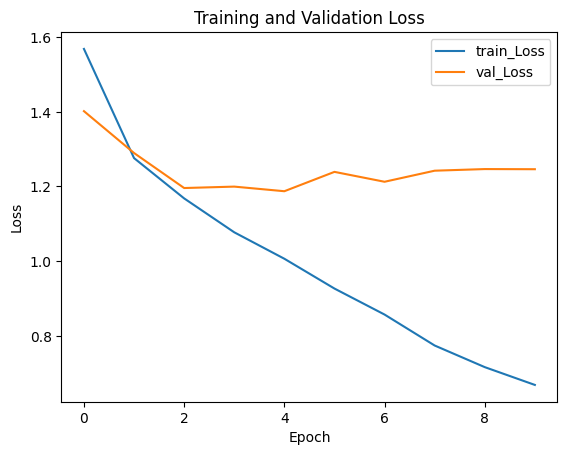

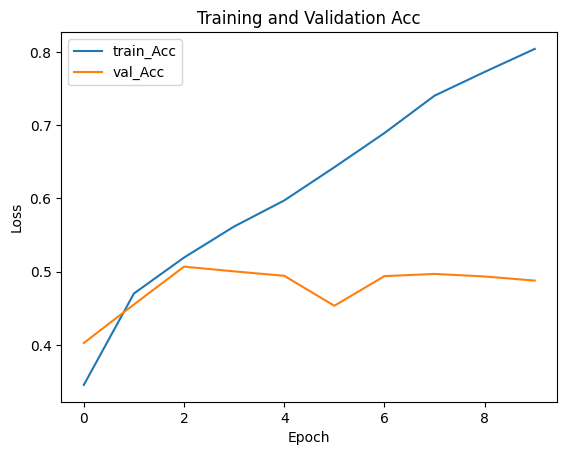

In [ ]:
import matplotlib.pyplot as plt

def plot_results(train_result, val_results, type_results):
  plt.title("Training and Validation " + type_results)
  plt.plot(train_result, label="train_" + type_results)
  plt.plot(val_results, label="val_" + type_results)
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

plot_results(train_losses, valid_losses, "Loss")
plot_results(train_accs, valid_accs, "Acc")